# Data Preprocessing: Scaling and Normalizing

### Data

We will be using data from https://www.kaggle.com/rtatman/data-cleaning-challenge-scale-and-normalize-data/data

In [1]:
# set up environment
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scaling vs. Normalization: What's the difference?

In both cases, transforms values of numeric variables so that the transformed data points has more helpful properties

the difference is that:
- in scaling, you're changing the *range* of your data while 
- in normalization you're changing the *shape of the distribution* of your data. 

# Scaling

Transforming your data so that it fits within a specific scale, like 0-100 or 0-1.  

You want to scale data when you're using methods based on measures of how far apart data points, like [support vector machines, or SVM](https://en.wikipedia.org/wiki/Support_vector_machine) or [k-nearest neighbors, or KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). With these algorithms, a change of "1" in any numeric feature is given the same importance. 

We will be using `sklearn.preprocessing.MinMaxScaler`

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

`X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))`

$$X^{'} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

Where max/min are max/min of each columns

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
X = pd.DataFrame([[1,2],[3,4]])
X

,0,1
0,1,2
1,3,4


In [4]:
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0., 0.],
       [1., 1.]])

In [5]:
# generate 1000 data points randomly drawn from an exponential distribution

original_data = np.random.exponential(size = 1000).reshape(1000,1)
original_data

array([[5.49317709e-01],
       [8.97250994e-01],
       [7.54938934e-01],
       [4.55073807e-01],
       [1.13704258e+00],
       [8.09196675e-02],
       [4.33443536e+00],
       [1.83217014e+00],
       [9.86240402e-01],
       [4.70609349e-01],
       [1.74016042e+00],
       [8.47476417e-01],
       [7.77322082e-01],
       [5.07773194e-01],
       [4.79488983e-01],
       [3.88680291e-01],
       [2.82542888e-02],
       [8.77370519e-01],
       [2.96992208e+00],
       [5.22564527e-01],
       [1.11157362e+00],
       [1.78866387e-01],
       [8.33367226e-01],
       [3.03384390e-01],
       [6.04193051e-01],
       [3.43311224e+00],
       [3.76790052e-01],
       [1.25528504e+00],
       [3.92410041e-01],
       [1.39182297e-01],
       [1.00795815e+00],
       [1.50066319e-01],
       [5.70020735e-01],
       [8.31761219e-01],
       [5.87962591e-02],
       [1.77620191e+00],
       [7.28283837e-01],
       [7.49481170e-01],
       [3.86515997e-01],
       [1.17339916e+00],


Text(0.5,1,'Scaled data')

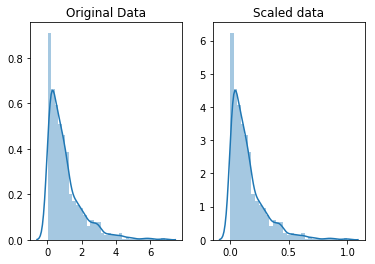

In [6]:
# mix-max scale the data between 0 and 1
scaler = MinMaxScaler()
scaler.fit(original_data)
scaled_data = scaler.transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Observe that they have the same distribution, but different range

# Normalization

This transforms your data so that it can be described as a normal distribution

Normal Distribution link here

In general, you'll want to normalize your data if the ML/ statistical technique that you are using assumes that the data is normally distributed

We can use various l data transformation technique used to 
- stabilize variance, 
- make the data more normal distribution-like, 
- improve the validity of measures of association such as the Pearson correlation between variables and for other data stabilization procedures.

One method is the boxcox, we will be using `scipy.stats.boxcox` https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

In [7]:
from scipy import stats

Text(0.5,1,'Normalized data')

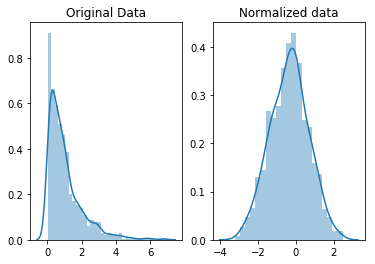

In [8]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5,1,'Normalized data')

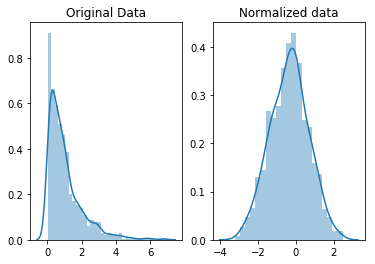

In [9]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data, lmbda=None)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

# Practice

In [10]:
ks = pd.read_csv("data/day_2/ks-projects-201801.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [11]:
stats.describe(ks.usd_goal_real)

DescribeResult(nobs=378661, minmax=(0.01, 166361390.71), mean=45454.40146545326, variance=1329293829529.4392, skewness=78.22053860832382, kurtosis=7082.79369668181)

Let scale the amount of money they asked for (usd_goal_real)

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ks[["usd_goal_real"]])
scaled_data

array([[9.22052884e-06],
       [1.80330243e-04],
       [2.70495394e-04],
       ...,
       [9.01650914e-05],
       [9.01650914e-05],
       [1.20219601e-05]])

Text(0.5,1,'Scaled data')

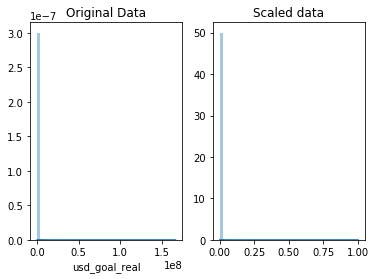

In [13]:
fig, ax = plt.subplots(1,2) # #of rows, #of cols

sns.distplot(ks.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

It looks funny because looks like most campaigns have small goals but a few have very large ones.

You can see that scaling changed the scales of the plots dramatically but not the shape of the dat

Lets try normalizing

In [14]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [16]:
posp = ks[ks["usd pledged"]>0]["usd pledged"]

normp = stats.boxcox(posp)

Text(0.5,1,'Normalized data')

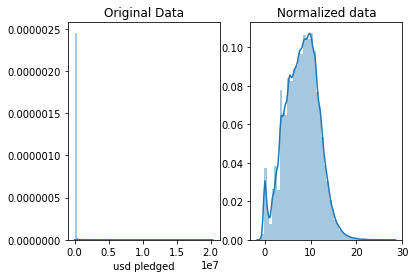

In [17]:
fig, ax = plt.subplots(1,2)

sns.distplot(posp, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normp[0], ax=ax[1])
ax[1].set_title("Normalized data")